In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS= 3
EPOCHS= 50


In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle= True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

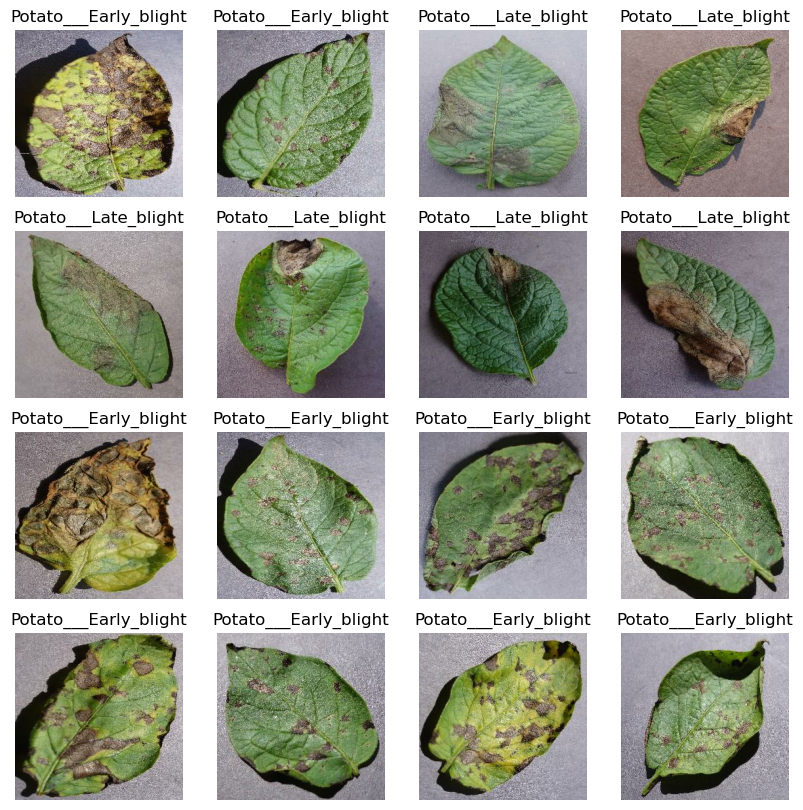

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [7]:
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test


In [8]:
train_size = .8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(66)
len(train_ds)

66

In [10]:
test_ds = dataset.skip(66)
len(test_ds)

2

In [11]:
val_size = .1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

2

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

0

In [14]:
def get_dataset_partitions_tf(ds, train_split=.8, val_split=.1, test_split=.1, shuffle= True, shuffle_size=1000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation="relu", input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size= (3,3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size= (3,3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer= "adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ["accuracy"]
)

In [25]:
history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size= BATCH_SIZE,
    verbose= 1,
    validation_data= val_ds
)

Epoch 1/50


54/54 [==============================] - 20s 296ms/step - loss: 0.9398 - accuracy: 0.4716 - val_loss: 0.8642 - val_accuracy: 0.5000
Epoch 2/50
54/54 [==============================] - 16s 290ms/step - loss: 0.8757 - accuracy: 0.5231 - val_loss: 0.7715 - val_accuracy: 0.6302
Epoch 3/50
54/54 [==============================] - 15s 274ms/step - loss: 0.5886 - accuracy: 0.7535 - val_loss: 0.4009 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 15s 275ms/step - loss: 0.4121 - accuracy: 0.8281 - val_loss: 0.2738 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 15s 274ms/step - loss: 0.2968 - accuracy: 0.8825 - val_loss: 0.2427 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 15s 275ms/step - loss: 0.2782 - accuracy: 0.8929 - val_loss: 0.2050 - val_accuracy: 0.8958
Epoch 7/50
54/54 [==============================] - 15s 274ms/step - loss: 0.2439 - accuracy: 0.9039 - val_loss: 0.2498 - val_accuracy: 0.89

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 1s 82ms/step - loss: 0.3944 - accuracy: 0.8984


In [27]:
scores

[0.39438873529434204, 0.8984375]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

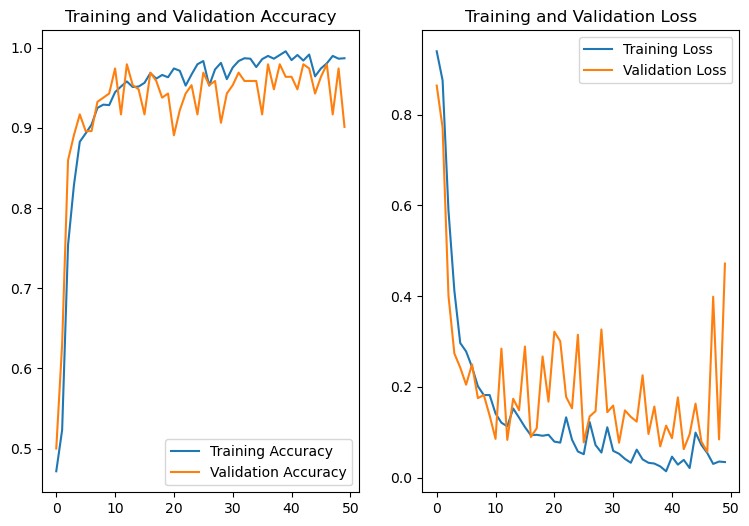

In [32]:
plt.figure(figsize=(9, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()


First Image to Predict
Actual Label: Potato___Early_blight
1/1 [==============================] - 0s 237ms/step
Predicted Label: Potato___Early_blight


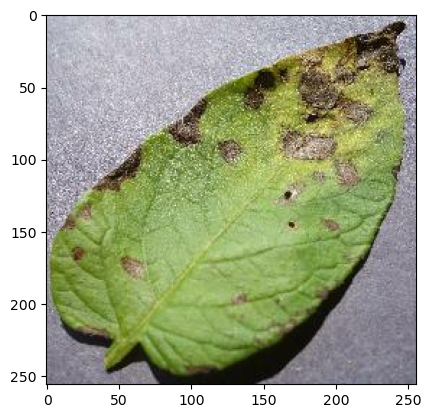

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])
    

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


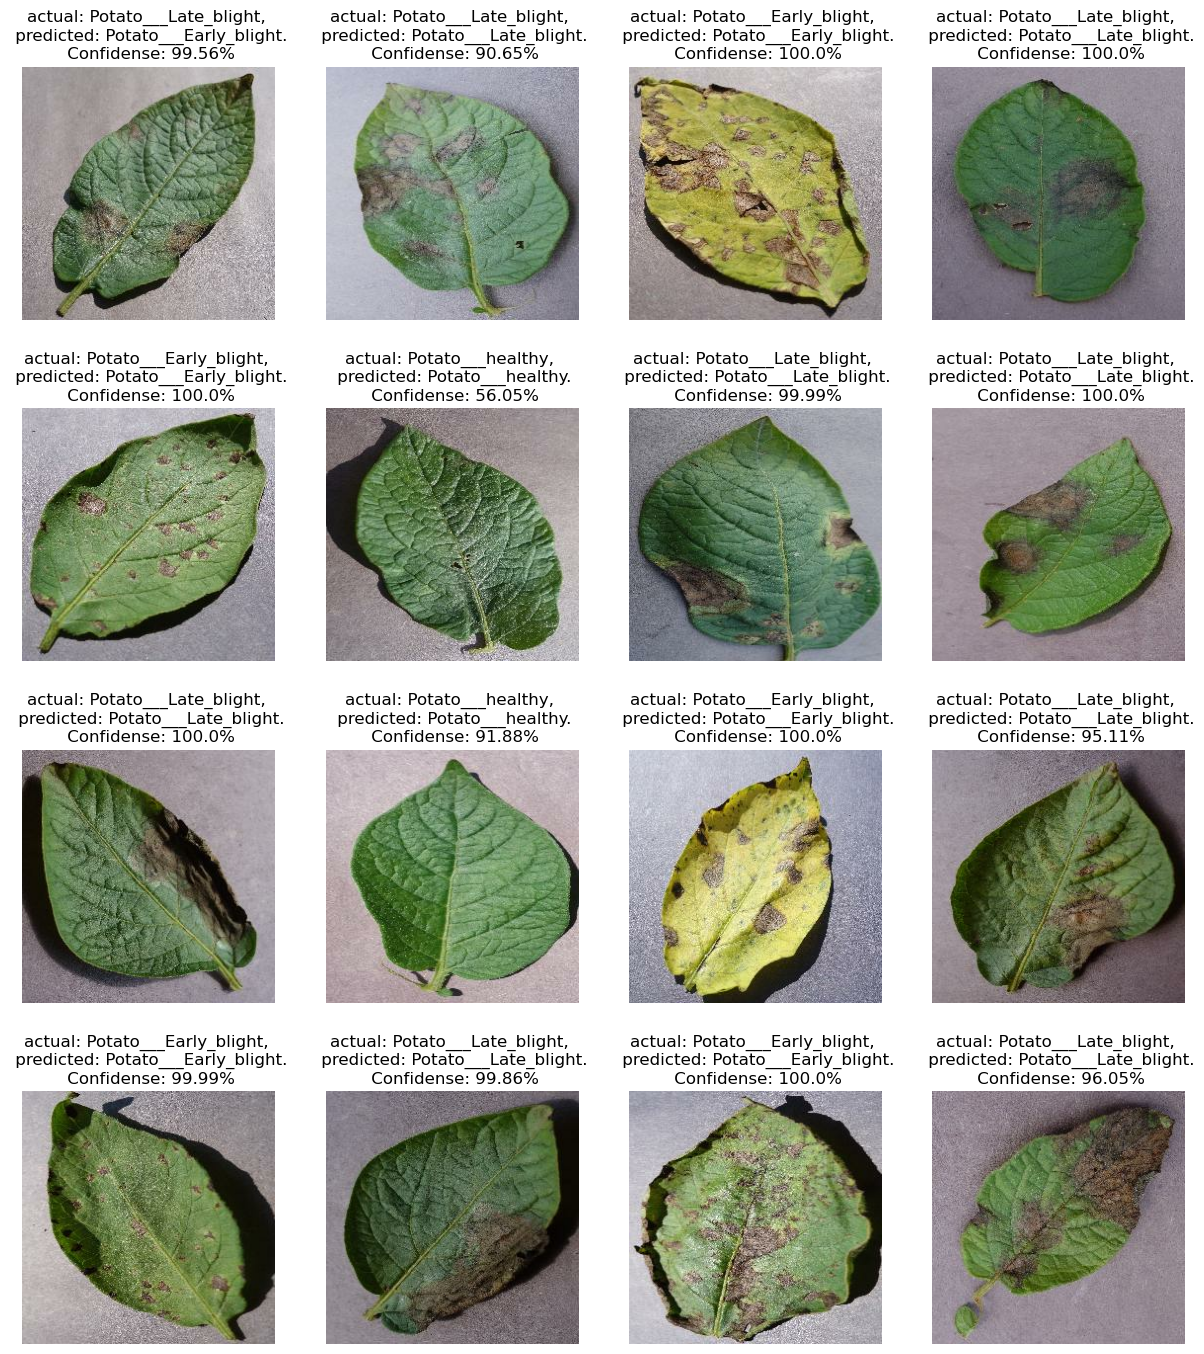

In [35]:
plt.figure(figsize=(15, 17))

for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4,4, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"actual: {actual_class}, \n predicted: {predicted_class}.\n Confidense: {confidence}%")
        plt.axis("off")


In [36]:
import os
model_version = max([int(i) for i in os.listdir("../saved_models") +[0]]) +1
model.save(f"../saved_models/ {model_version}")

INFO:tensorflow:Assets written to: ../saved_models/ 4\assets


INFO:tensorflow:Assets written to: ../saved_models/ 4\assets
